# **Moladin Data Science Case Study**

By Ediashta Revindra Amirussalam

## Project Overview

### Background

Moladin provides capital for agents to buy used cars and in return Moladin charges fees (admin
fee & aging fee) to agents when the cars are successfully sold.
Every car buyout proposal by an agent has to be approved by the branch manager. In order to
make an informed decision, the branch manager has to consider several parameters.


### Objective

To assist the branch managers in the approval process whether a car is worth buying or not given the historical [dataset](https://drive.google.com/file/d/1AYeEfb1r75cdxHiYpO6k9js4IIIFkCCi/view).

### Project Scope

**Fill Later**

## 01. Import Libraries

In [166]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from feature_engine.outliers import Winsorizer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import silhouette_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

## 02. Data Loading

In [167]:
#loading data from csv
df = pd.read_csv('./case_study_data.csv')

df.shape

(8023, 18)

In [168]:
df.columns

Index(['product_id', 'license_plate', 'car_year', 'car_brand', 'car_model',
       'car_type', 'car_transmission', 'car_engine_size', 'car_color',
       'inspection_score', 'agent_id', 'branch_id', 'buy_date', 'buy_price',
       'admin_fee', 'aging_fee', 'sell_date', 'sell_price'],
      dtype='object')

In [169]:
#check data basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        8023 non-null   int64  
 1   license_plate     8023 non-null   int64  
 2   car_year          8023 non-null   int64  
 3   car_brand         8023 non-null   object 
 4   car_model         8023 non-null   object 
 5   car_type          8023 non-null   object 
 6   car_transmission  8023 non-null   object 
 7   car_engine_size   8023 non-null   float64
 8   car_color         8023 non-null   object 
 9   inspection_score  8023 non-null   int64  
 10  agent_id          8016 non-null   float64
 11  branch_id         8023 non-null   int64  
 12  buy_date          8023 non-null   object 
 13  buy_price         8023 non-null   float64
 14  admin_fee         8023 non-null   float64
 15  aging_fee         8023 non-null   float64
 16  sell_date         8023 non-null   object 


In [170]:
df.columns

Index(['product_id', 'license_plate', 'car_year', 'car_brand', 'car_model',
       'car_type', 'car_transmission', 'car_engine_size', 'car_color',
       'inspection_score', 'agent_id', 'branch_id', 'buy_date', 'buy_price',
       'admin_fee', 'aging_fee', 'sell_date', 'sell_price'],
      dtype='object')

In [171]:
#change type to datetime
df['buy_date'] = df['buy_date'].astype('datetime64[ns]')
df['sell_date'] = df['sell_date'].astype('datetime64[ns]')

df[['buy_date', 'sell_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   buy_date   8023 non-null   datetime64[ns]
 1   sell_date  8023 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 125.5 KB


In [172]:
df.head()

,product_id,license_plate,car_year,car_brand,car_model,car_type,car_transmission,car_engine_size,car_color,inspection_score,agent_id,branch_id,buy_date,buy_price,admin_fee,aging_fee,sell_date,sell_price
0,133126,265,2015,TOYOTA,ALL NEW AVANZA VELOZ,VVT-I,MT,1.5,Hitam,102,109618.0,289,2022-08-09,15788.0,266.0,0.0,2022-08-16,16053.0
1,134207,2396,2007,HONDA,NEW CR-V,4 X 2,AT,2.4,Hitam,103,53630.0,94,2022-08-15,11375.0,250.0,312.0,2022-09-18,11938.0
2,127971,4926,2015,SUZUKI,KARIMUN WAGON R,GL,MT,1.0,Silver,107,18827.0,397,2022-08-20,6288.0,250.0,0.0,2022-08-20,6538.0
3,126434,678,2014,DAIHATSU,AYLA,M SPORTY,MT,1.0,Hitam,107,19174.0,93,2022-07-28,9412.0,250.0,0.0,2022-07-30,9662.0
4,128325,1908,2017,SUZUKI,NEW ERTIGA,GX,MT,1.4,Putih,107,28462.0,19,2022-08-14,15375.0,250.0,0.0,2022-08-14,15625.0


In [173]:
df.isna().sum()

product_id          0
license_plate       0
car_year            0
car_brand           0
car_model           0
car_type            0
car_transmission    0
car_engine_size     0
car_color           0
inspection_score    0
agent_id            7
branch_id           0
buy_date            0
buy_price           0
admin_fee           0
aging_fee           0
sell_date           0
sell_price          0
dtype: int64

In [174]:
df.duplicated().sum()

0

In [175]:
df[df["agent_id"].isna()]

,product_id,license_plate,car_year,car_brand,car_model,car_type,car_transmission,car_engine_size,car_color,inspection_score,agent_id,branch_id,buy_date,buy_price,admin_fee,aging_fee,sell_date,sell_price
468,127311,5539,2017,TOYOTA,AGYA,G 1.2 TRD SPORTIVO,AT,1.2,Putih,106,NaN,71,2022-07-26,13750.0,250.0,188.0,2022-08-16,14125.0
557,136416,6326,2012,DAIHATSU,ALL NEW XENIA,M SPORTY,MT,1.0,Putih,105,NaN,68,2022-08-09,10625.0,250.0,188.0,2022-09-01,11062.0
1768,138448,643,2004,NISSAN,XTRAIL,ST,AT,2.5,ABU ABU METALIK,107,NaN,36,2022-08-19,7500.0,250.0,0.0,2022-08-19,7750.0
2715,139176,1317,2009,TOYOTA,AVANZA,G,MT,1.3,SILVER METALLIC,107,NaN,36,2022-08-24,10625.0,250.0,0.0,2022-08-24,10875.0
7323,132700,1340,2009,DAIHATSU,TERIOS,TX,AT,1.5,Hitam,107,NaN,289,2022-08-23,11875.0,250.0,0.0,2022-09-01,12125.0
7954,139491,644,1997,ISUZU,PANTHER,TBR54 STD,MT,2.5,ABU ABU METALIK,107,NaN,36,2022-08-21,5625.0,250.0,0.0,2022-08-21,5875.0
7981,135750,4581,2011,TOYOTA,AVANZA,G,MT,1.3,Hitam,107,NaN,36,2022-08-23,11875.0,250.0,312.0,2022-09-25,12438.0


In [176]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

## 03. EDA

In [177]:
#split numerical and categorical for visualization
num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=object).columns.tolist()

num_remove = ['product_id', 'license_plate', 'agent_id', 'branch_id']
cat_remove = ['car_model', 'car_type', 'car_color']

num_col_removed = [col for col in num_col if col not in num_remove]
cat_col_removed = [col for col in cat_col if col not in cat_remove]

In [178]:
cat_col

['car_brand', 'car_model', 'car_type', 'car_transmission', 'car_color']

In [179]:
#define hist plot
def plot_histogram_grid(data, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

    #create histograms using a for loop
    for index, columns in enumerate(data):
        if index < 4:
            sns.histplot(data[columns], ax=axes[0, index], bins=30, kde=True)
        elif index < 8:
            sns.histplot(data[columns], ax=axes[1, index-4], bins=30, kde=True)
    
    plt.tight_layout()
    plt.show(fig)
    
#define bar plot
def plot_count_grid(data, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4))
    
    #create barplot
    for index, columns in enumerate(data):
        if index < 2:
            sns.countplot(data = data, x= columns, ax = axes[index])
        
    plt.tight_layout()
    plt.show(fig)

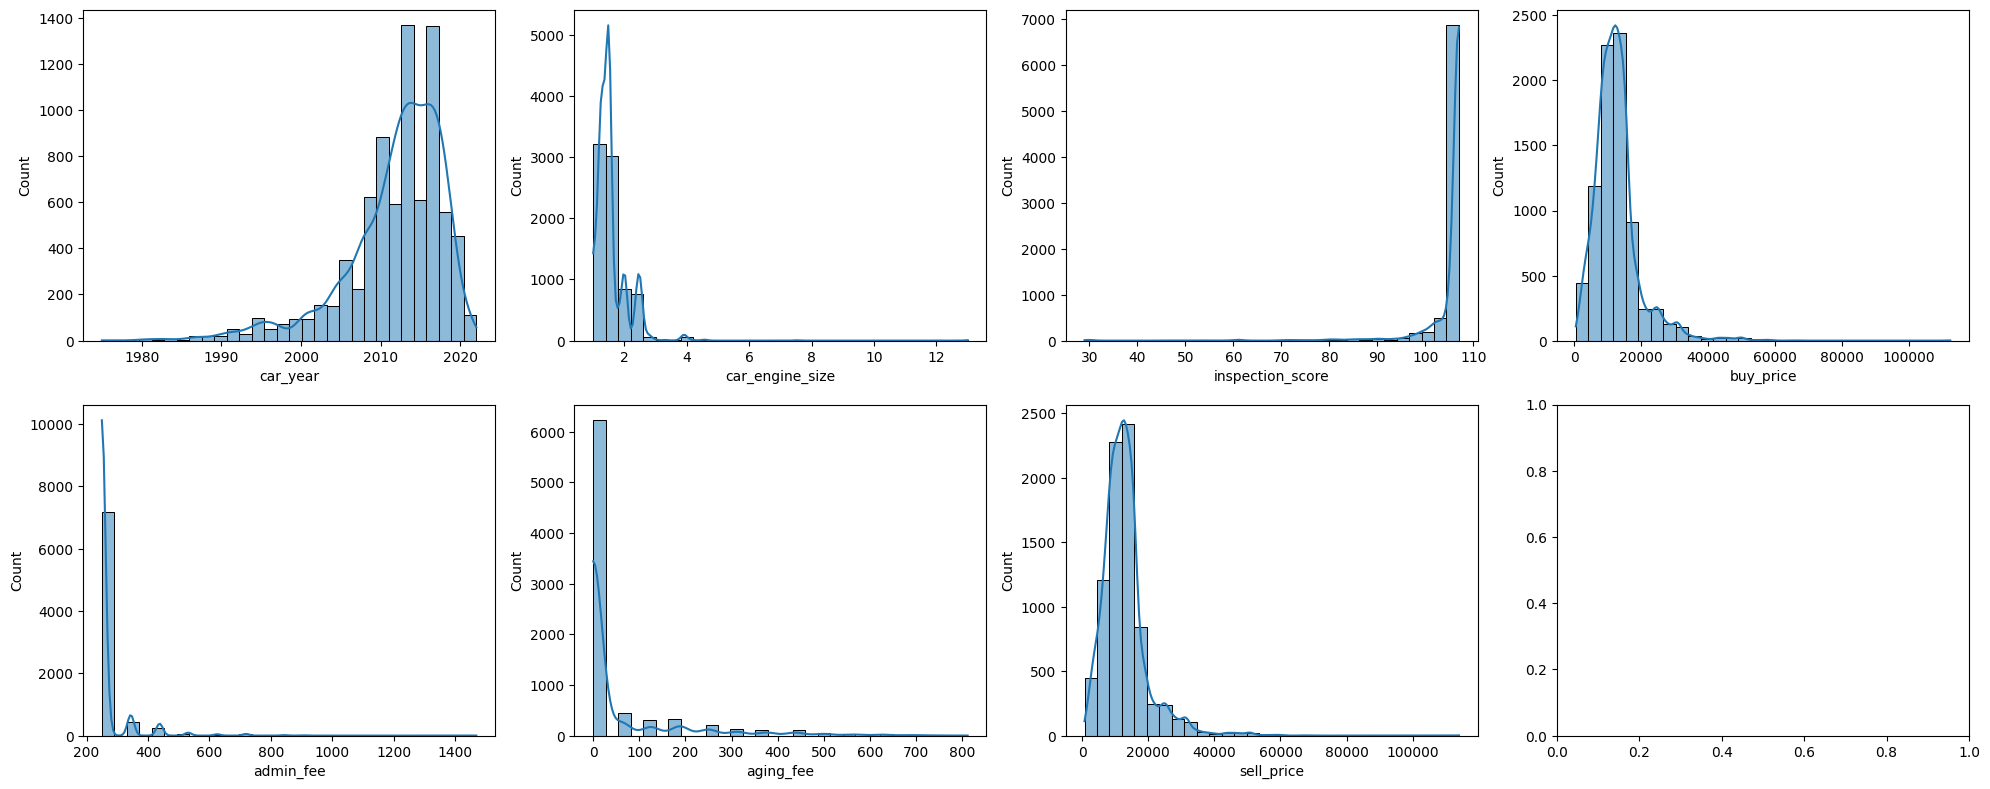

In [180]:
plot_histogram_grid(df[num_col_removed], num_rows=2, num_cols=4)

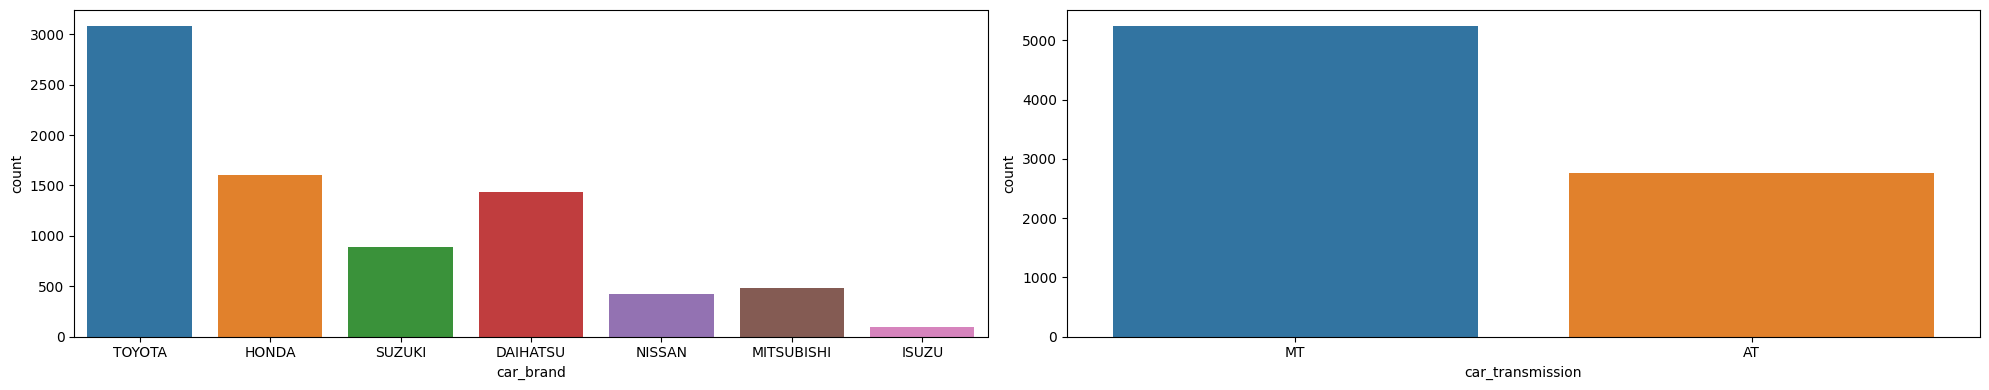

In [181]:
plot_count_grid(df[cat_col_removed], num_rows=1, num_cols=2)

In [182]:
#def cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

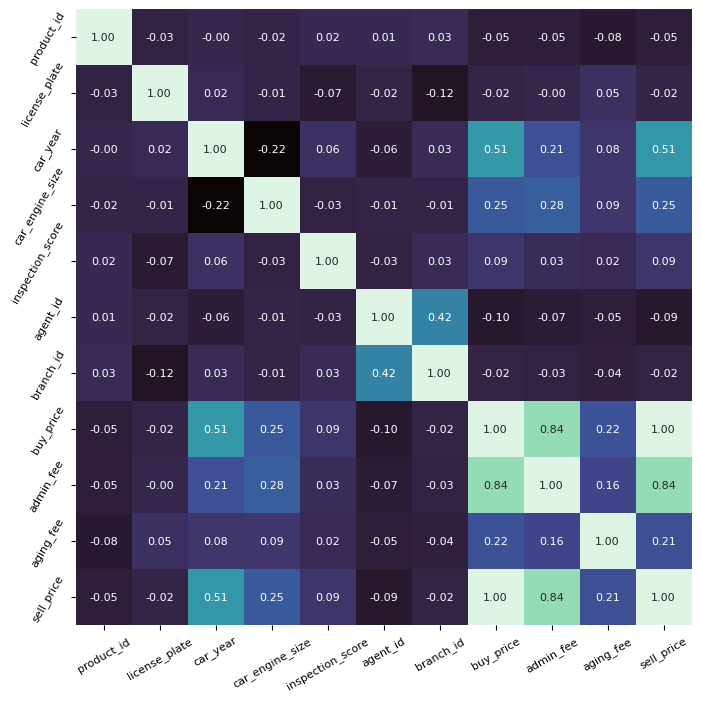

In [183]:
corr_matrix = df[num_col].corr(method="pearson")
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='mako', square=True, annot_kws={"fontsize" : 8}, fmt=".2f", cbar=False)
plt.xticks(rotation=30, fontsize=8)
plt.yticks(rotation=60, fontsize=8)
plt.show()

In [184]:
print("Correlation")
for i in cat_col:
    print(f"{i} :",cramers_v(df[i], df["sell_price"]))
    

Correlation
car_brand : 0.20626701342107936
car_model : 0.2604847201713146
car_type : 0.22094135362568965
car_transmission : 0.3279422346270436
car_color : 0.1637071289436255


<Axes: xlabel='buy_price', ylabel='sell_price'>

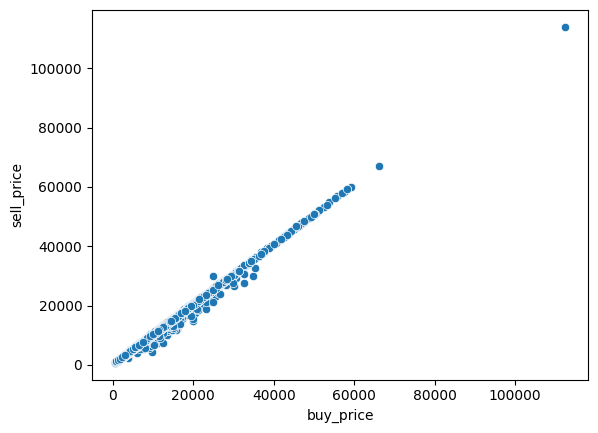

In [185]:
#check correlation between buy price and sell price
sns.scatterplot(x=df['buy_price'], y=df['sell_price'])

<Axes: xlabel='inspection_score', ylabel='sell_price'>

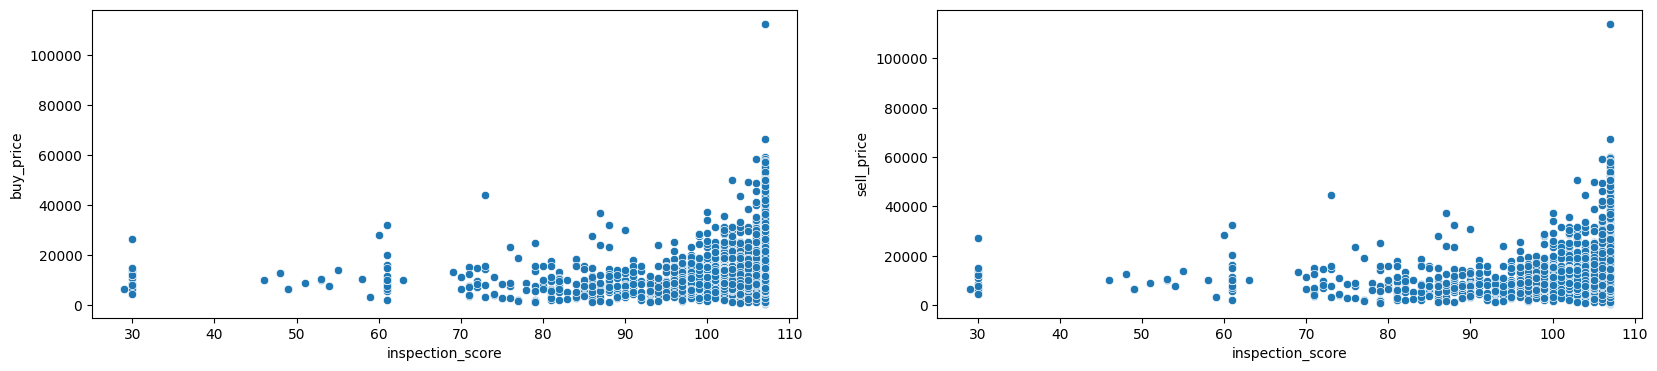

In [186]:
#check correlation from inspection score
fig, axes = plt.subplots(1,2, figsize=(20,4))
sns.scatterplot(x=df['inspection_score'], y=df['buy_price'], ax=axes[0])
sns.scatterplot(x=df['inspection_score'], y=df['sell_price'], ax=axes[1])

there is some clear separation in inspection score below 70

In [187]:
#create label for inspection score below 70
labels = []
for index, row in df.iterrows():
    if row['inspection_score'] < 70:
        labels.append("Low Inspection Score")
    else:
        labels.append("High Inspection Score")
        
# df["inspection_score_label"] = labels

In [190]:
# sns.pairplot(data=df, y_vars='inspection_score', hue='inspection_score_label')

In [191]:
#check difference 
target_price = []
actual_price = []
revenue_total = []
for index, row in df.iterrows():
    target = row['buy_price'] + row['admin_fee'] + row['aging_fee']
    actual = row['sell_price']
    revenue = actual - target
    target_price.append(target)
    actual_price.append(actual)
    revenue_total.append(revenue)

price_comp = pd.DataFrame({
    'target_price' : target_price, 
    'actual_price' : actual_price,
    'revenue' : revenue_total})

<Axes: xlabel='target_price', ylabel='actual_price'>

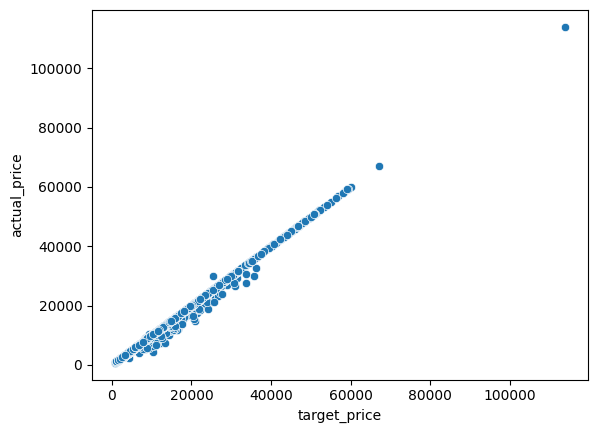

In [192]:
sns.scatterplot(x=price_comp['target_price'], y=price_comp['actual_price'])

In [193]:
price_comp['revenue'].mean()

-52.224550898203596

In [194]:
price_comp['revenue'].sum()

-418632.0

In [195]:
px.histogram(price_comp, x='revenue', nbins=300)

In [196]:
negative_revenue_indices = price_comp.loc[price_comp['revenue'] < 0].index
positive_revenue_indices = price_comp.loc[price_comp['revenue'] >= 0].index

positive_revenue_df = df.loc[positive_revenue_indices]
negative_revenue_df = df.loc[negative_revenue_indices]

Text(0.5, 1.0, 'Positive Revenue')

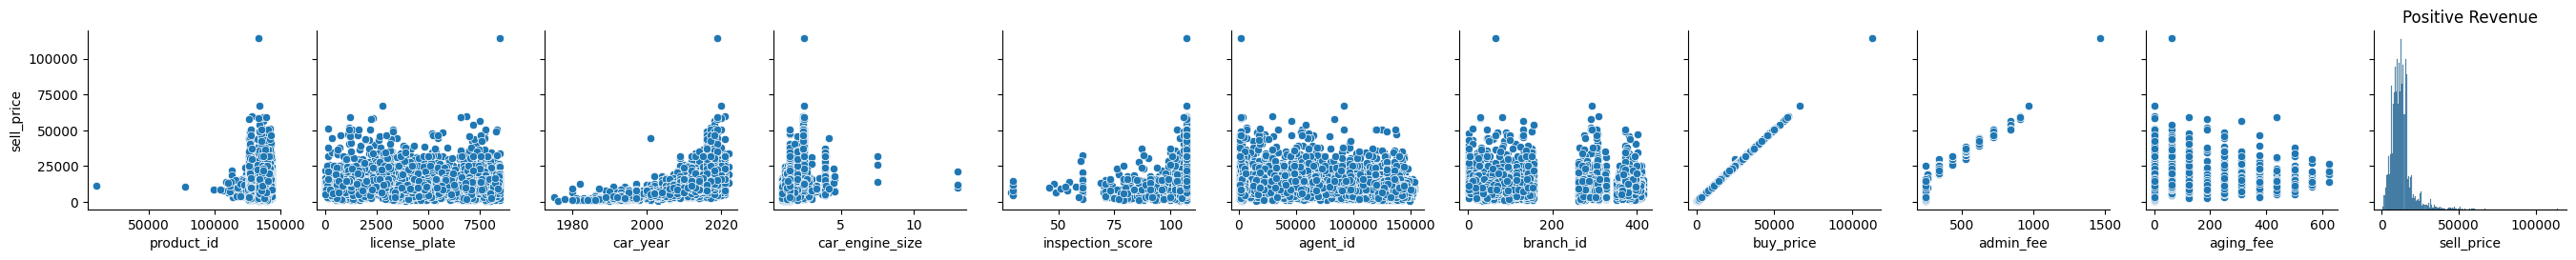

In [197]:
sns.pairplot(data=positive_revenue_df, y_vars='sell_price')
plt.title('Positive Revenue')

Text(0.5, 1.0, 'Negative Revenue')

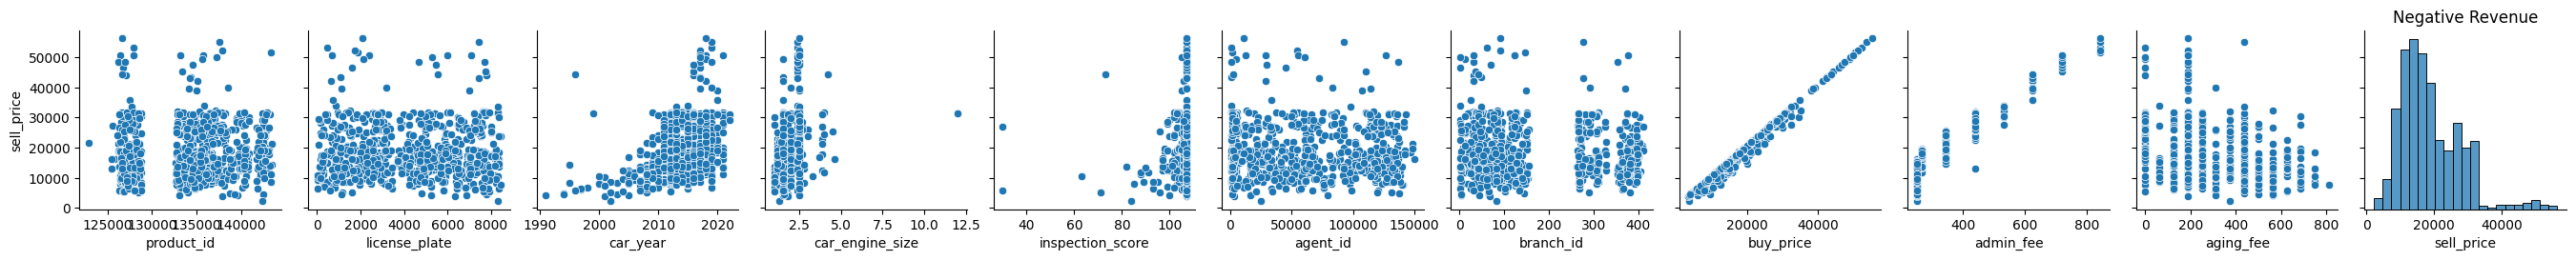

In [198]:
sns.pairplot(data=negative_revenue_df, y_vars='sell_price')
plt.title('Negative Revenue')

In [199]:
negative_revenue_df

,product_id,license_plate,car_year,car_brand,car_model,car_type,car_transmission,car_engine_size,car_color,inspection_score,agent_id,branch_id,buy_date,buy_price,admin_fee,aging_fee,sell_date,sell_price
0,133126,265,2015,TOYOTA,ALL NEW AVANZA VELOZ,VVT-I,MT,1.5,Hitam,102,109618.0,289,2022-08-09,15788.0,266.0,0.0,2022-08-16,16053.0
7,126784,2515,2012,MITSUBISHI,PAJERO,DAKAR 4X2,AT,2.5,Hitam,107,1939.0,49,2022-08-06,28788.0,438.0,188.0,2022-08-30,29412.0
13,135276,6589,2021,DAIHATSU,AYLA,M SPORTY,MT,1.0,Silver Metalic,107,135216.0,269,2022-08-07,13312.0,250.0,625.0,2022-10-05,11250.0
20,135502,6086,2011,SUZUKI,SWIFT,GT 3,MT,1.5,Putih,107,114084.0,116,2022-08-06,13250.0,250.0,250.0,2022-09-04,13125.0
25,142363,7315,2016,HONDA,HRV,S CVT,AT,1.5,PUTIH ORCHID,107,113668.0,265,2022-08-25,17538.0,266.0,0.0,2022-08-26,17803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,140892,7251,2017,TOYOTA,HILUX,Double Cabin G,MT,2.5,Putih,106,4518.0,51,2022-08-20,28438.0,438.0,0.0,2022-08-23,28875.0
7995,137399,2766,2018,TOYOTA,CALYA,G,MT,1.2,Hitam,107,64364.0,382,2022-09-01,14288.0,250.0,125.0,2022-10-09,14662.0
8005,134352,1716,2013,SUZUKI,APV,Arena SGX,MT,1.5,Silver,107,49515.0,61,2022-08-17,9125.0,250.0,188.0,2022-09-11,9562.0
8006,135408,287,2016,HONDA,BRIO,RS,AT,1.2,MERAH PEKAT MUTIARA,107,81129.0,54,2022-08-29,16875.0,266.0,250.0,2022-09-25,17328.0


## 03. Feature Engineering

### Feature Selection

In [21]:
selected_column = [
    'car_year',
    'car_engine_size',
    'inspection_score',
    'buy_price',
    'admin_fee',
    'agent_id',
    'aging_fee',
    'car_transmission',
    'sell_price']
df_selected = df[selected_column]

num_col = ['car_year', 'car_engine_size', 'admin_fee', 'agent_id', 'buy_price', 'aging_fee']
cat_col = df_selected.select_dtypes(include=object).columns.tolist()

num_col, cat_col

(['car_year',
  'car_engine_size',
  'admin_fee',
  'agent_id',
  'buy_price',
  'aging_fee'],
 ['car_transmission'])

### Split Train Test

In [22]:
X = df_selected.drop(columns='sell_price')
y = df_selected["sell_price"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Outliers Handling

In [24]:
#boxplot function
def box_plot(column, loc, row, axs):
    ax = sns.boxplot(data=df, x=column, ax=axs[loc,row], fliersize=3, boxprops=dict(alpha=.7))
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

In [25]:
num_col

['car_year',
 'car_engine_size',
 'admin_fee',
 'agent_id',
 'buy_price',
 'aging_fee']

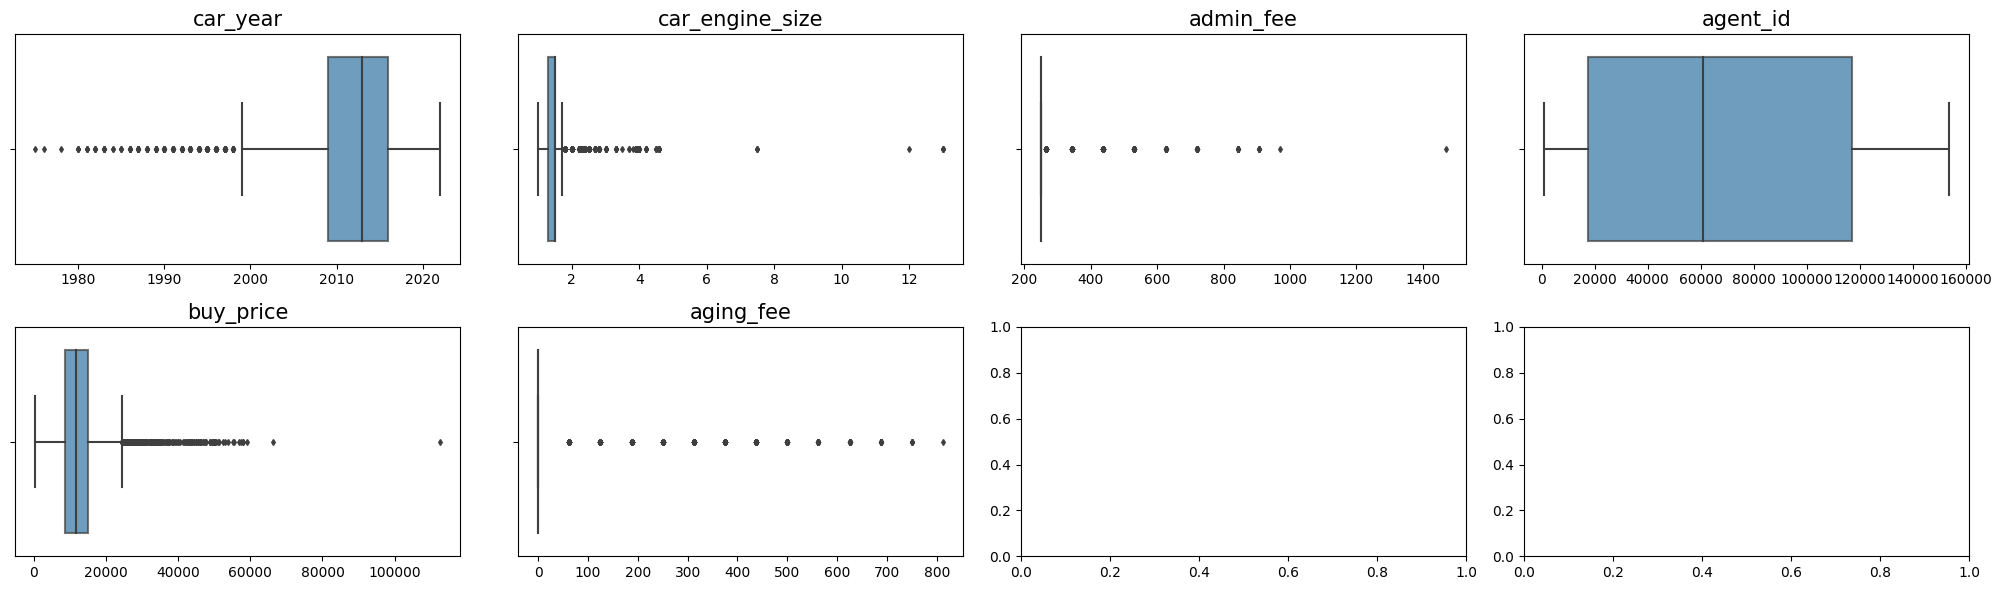

In [26]:
#loop boxplot
fig, axs = plt.subplots(2,4, figsize=(20,6))
for i,x in enumerate(num_col):
    if i < 4:
        box_plot(x, 0, i, axs)
    elif i < 8:
        box_plot(x, 1, i-4, axs)
        
fig.tight_layout()

In [27]:
outliers = ['car_year', 'buy_price']

In [28]:
#create the capper
winsorizer_transformer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=outliers)

X_train_transformed = winsorizer_transformer.fit_transform(X_train)

### Scale and Encode

In [29]:
#robust scaler
robust_scaler_transformer = RobustScaler()

In [30]:
#minmax scaler
minmax_scaler_transformer = MinMaxScaler()

In [31]:
#onehot encoder
onehot_encoder_transformer = OneHotEncoder(handle_unknown="ignore")


In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', robust_scaler_transformer, num_col),
        ('minmax', minmax_scaler_transformer, ['inspection_score']),
        ('onehot', onehot_encoder_transformer, cat_col)
    ])

## 04. Regression

### Linear Regression

In [33]:
lin_reg = LinearRegression()

lin_reg_pipeline = Pipeline(
    [
        ('col_transformer', preprocessor),
        ('lin_reg', lin_reg)
    ]
)

In [34]:
lin_reg_pipeline.fit(X_train_transformed, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['car_year',
                                                   'car_engine_size',
                                                   'admin_fee', 'agent_id',
                                                   'buy_price', 'aging_fee']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['inspection_score']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_transmission'])])),
                ('lin_reg', LinearRegression())])

In [37]:
lin_reg_score = cross_val_score(lin_reg_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


print("Cross-validation scores:", lin_reg_score)
print("Mean CV score:", lin_reg_score.mean())

Cross-validation scores: [-127.08753847 -117.69272262 -130.16732848 -116.38380636 -118.95586718]
Mean CV score: -122.05745262127712


### Decision Tree

In [38]:
#define Model
decision_tree = DecisionTreeRegressor()

dt_pipeline = Pipeline([
    ("col_transformer", preprocessor),
    ("decision_tree", decision_tree)
])

In [40]:
dt_pipeline.fit(X_train_transformed, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['car_year',
                                                   'car_engine_size',
                                                   'admin_fee', 'agent_id',
                                                   'buy_price', 'aging_fee']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['inspection_score']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_transmission'])])),
                ('decision_tree', DecisionTreeRegressor())])

In [42]:
decision_tree_score = cross_val_score(dt_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


print("Cross-validation scores:", decision_tree_score)
print("Mean CV score:", decision_tree_score.mean())

Cross-validation scores: [ -96.13715711  -75.80723643  -95.63817842  -84.24454148 -122.63693075]
Mean CV score: -94.89280883878885


### Random Forest

In [43]:
#define Model
rf = RandomForestRegressor()

rf_pipeline = Pipeline([
    ("col_transformer", preprocessor),
    ("random_forest", rf)
])

In [45]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['car_year',
                                                   'car_engine_size',
                                                   'admin_fee', 'agent_id',
                                                   'buy_price', 'aging_fee']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['inspection_score']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_transmission'])])),
                ('random_forest', RandomForestRegressor())])

In [46]:
rf_score = cross_val_score(rf_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


print("Cross-validation scores:", rf_score)
print("Mean CV score:", rf_score.mean())

Cross-validation scores: [ -81.3679068   -71.52165253  -84.66192764  -63.97082658 -112.13889582]
Mean CV score: -82.7322418706431


### XGBoost

In [47]:
xgb = XGBRegressor()

xgb_pipeline = Pipeline(
    [
        ('col_transformer', preprocessor),
        ('xgb', xgb)
    ]
)

In [48]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['car_year',
                                                   'car_engine_size',
                                                   'admin_fee', 'agent_id',
                                                   'buy_price', 'aging_fee']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['inspection_score']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_transmission'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [49]:
xgb_score = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


print("Cross-validation scores:", xgb_score)
print("Mean CV score:", xgb_score.mean())

Cross-validation scores: [ -96.28789142  -92.75440641  -96.53311776  -86.72048526 -120.81762307]
Mean CV score: -98.62270478255974


In [62]:
# Define the parameter grid for grid search
param_grid = {
    'random_forest__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'random_forest__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'random_forest__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'random_forest__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'random_forest__bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['car_year',
                                                                          'car_engine_size',
                                                                          'admin_fee',
                                                                          'agent_id',
                                                                          'buy_price',
                                                                          'aging_fee']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['inspection_score']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['car_transmission'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'random_forest__bootstrap': [True, False],
                         'random_forest__max_depth': [None, 10, 20, 30],
                         'random_forest__min_samples_leaf': [1, 2, 4],
                         'random_forest__min_samples_split': [2, 5, 10],
                         'random_forest__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [64]:
# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on your test data
y_pred = best_estimator.predict(X_test)  # Replace X_test with your test data
mae = mean_absolute_error(y_test, y_pred)

# Print the best parameters and classification report
print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)

Best Parameters: {'random_forest__bootstrap': True, 'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 300}
Mean Absolute Error: 78.86995126766415
